# Assignment 4
Realfagslektormaster, programing course

Author: Paul Knutson

## 1

### $(i)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math


def zeta(m, s):
    """Zeta function for a singluar m and s."""
    result = 0
    for n in range(int(m)):
        result += 1/np.power(float(n+1), s)
    
    return result


def zeta_function_m(s=4):
    """Iterative Zeta function for a range of m's."""
    start = 2
    stop = 40
    
    x = np.linspace(start, stop, stop - start + 1)
    y = np.zeros(len(x))
    for i in range(len(x)):
        y[i] = zeta(x[i], s)
    
    return x, y


def zeta_function_s(m):
    """Iterative Zeta function for a range of s's."""
    start = -5
    stop = 5
    
    x = np.linspace(start, stop, stop - start + 1)
    y = np.zeros(len(x))
    for i in range(len(x)):
        y[i] = zeta(m, x[i])
    
    return x, y


#fig = plt.figure()
x, y = zeta_function_s(5)
#print(x)
plt.plot(x, y)
plt.show()

# zeta_function_m(s)
#   m controls smoothness of curve.
#   s controls bend.
#   s = 0 results in a straight line, from about (0,0) to (m,m)
#   As s goes towards -inf, the curve will bend to the bottom right.
#   As s goes towards +inf, the curve will bend to the top left.

# zeta_function_s(m)
#   s range (stop - start) controls the smoothness of the curve.
#   m < 2 results in a straight horizontal line at 1.
#   As m->+inf, the curve will bend to the bottom left.
#   This will also happen if the s range becomes larger.

<Figure size 640x480 with 1 Axes>

### $(ii)$

$$ \zeta(2) = \lim_{m \to \infty} \zeta(2)_m = \frac{\pi^2}{6} $$

In [2]:
print("\n\nEstimation, zeta(2) = pi^2/6")
estimate = zeta(1000, 2)
print(estimate)

actual_value = math.pi**2/6
print(actual_value)

print("Absolutt error: " + str(abs(estimate - actual_value)))



Estimation, zeta(2) = pi^2/6
1.6439345666815615
1.6449340668482264
Absolutt error: 0.0009995001666649461


$$ \zeta(4) = \lim_{m \to \infty} \zeta(4)_m = \frac{\pi^4}{90} $$

In [3]:
print("\n\nEstimation, zeta(4) = pi^4/90")
estimate = zeta(1000, 4)
print(estimate)

actual_value = math.pi**4/90
print(actual_value)

print("Absolutt error: " + str(abs(estimate - actual_value)))



Estimation, zeta(4) = pi^4/90
1.082323233378306
1.082323233711138
Absolutt error: 3.328319841955363e-10


### $(iii)$

For any $r \gg 0$, $| \zeta(2)_m - \frac{\pi^2}{6} | < 10^{-1}$, for any $m \geq N_r = 10^r$

I.e. if $r = 3.5$, $m$ must be at least $10^{3.5} \approx 3162.27766...$. In this case, $m \geq 3162$.

In [4]:
def check_r(r):
    m = 0
    while abs(zeta(m, 2) - np.pi**2/6) >= 10**-r:
        m += 1
        if m > 4000:
            return m
    return m

print(check_r(2))

100


## 2

### $(i)$

In [5]:
import matplotlib.pyplot as plt
import numpy as np


def plot_ell(c, a, b, min_x=0, max_x=2*np.pi, d=100):
    t = np.linspace(min_x, max_x, d)
    #x = f(t, a)
    #y = g(t, b)
    x, y = c(t, a, b)
    plt.plot(x, y)
    plt.show()


def plot(f, g, min_x=0, max_x=2*np.pi, d=100):
    t = np.linspace(min_x, max_x, d)
    x = f(t)
    y = g(t)
    plt.plot(x, y)
    plt.show()

### $(ii)$

Any non-zero values of $a$ and $b$ will make the following formula describe an ellipse:

$$ c(\theta) = \big( a \, cos(\theta), b \, sin(\theta) \big), \quad 0 \leq \theta \leq 2\pi $$

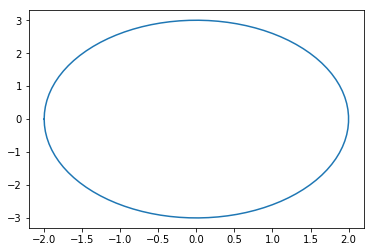

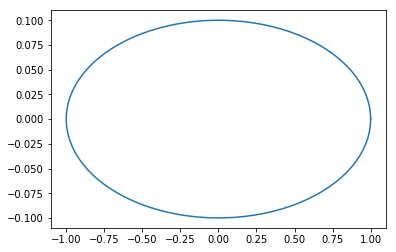

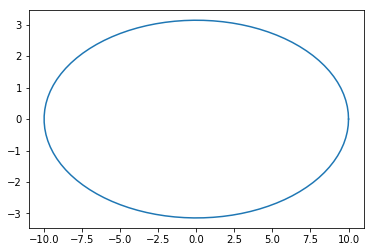

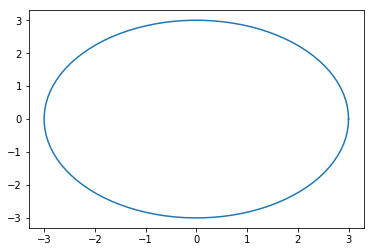

In [6]:
import matplotlib.pyplot as plt
import numpy as np


def f(t, a):
    return a * np.cos(t)


def g(t, b):
    return b * np.sin(t)


def c(t, a, b):
    x = f(t, a)
    y = g(t, b)
    return x, y


plot_ell(c, -2, -3)
plot_ell(c, 1, 0.1)
plot_ell(c, 10, np.pi)
plot_ell(c, 3, 3)


# a describes the x-scale. b describes the y-scale.
# The ellipse will have an r in the y-axis of 2*b, from -b to b.
# The ellipse will have an r in the x-axis of 2*a, from -a to a.
# Whether a and/or b are positive or negative does not affect the result.

### $(iii)$ (pt. 1)

Numerical derivation and ellipse arc length finder, based on numerical integration.

In [7]:
import matplotlib.pyplot as plt
import numpy as np


def derr(f, x):
    h = 1/10000
    dy = (f(x+h) - f(x))/h
    return dy


def arc_length(f, g, a, b):
    d = 10000
    dt = 1/d
    integral = 0
    for i in range(d-1):
        t = (i*dt)*(b-a) + a
        func = np.sqrt(derr(f, t)**2 + derr(g, t)**2)
        integral += func*dt*(b-a)
    
    return integral

1.478719258945574


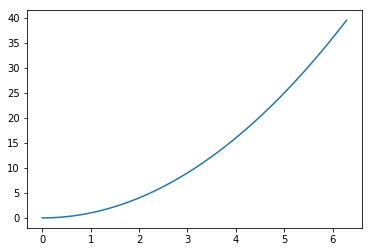

In [8]:
def f(t):
    return t


def g(t):
    return t**2


print(arc_length(f, g, 0, 1))


plot(f, g)

In [9]:
import numpy as np

def df(t):
    """ g(t) = t"""
    return 1


def dg(t):
    """f(t) = t^2"""
    return 2*t


def f(t):
    return np.sqrt(df(t)**2 + dg(t)**2)


def arc_length(a, b):
    d = 10000
    dt = 1/d
    integral = 0
    for i in range(d-1):
        t = (i*dt)*(b-a) + a
        integral += f(t)*dt*(b-a)
    
    return integral


print("x:\t", "1.4789428575445974 (W|A)")
print("x_est:\t", arc_length(0, 1))

x:	 1.4789428575445974 (W|A)
x_est:	 1.4786574667270478


### $(iv) + (v)$

Arc length using numerical elliptical integration. Solution for both $(iv)$ and $(v)$.

In [10]:
import numpy as np


def e_sq(a, b):
    return np.sqrt(1 - b**2/a**2)


def f(a, b, theta):
    return np.sqrt(1 - e_sq(a, b)**2 * np.sin(theta)**2)


def arc_length_ell(a, b):
    d = 10000
    integral = 0
    for i in range(d):
        theta = i/d * np.pi/2
        integral += f(a, b, theta)
    
    return 4*a*integral/d*np.pi/2


print(arc_length_ell(10, 5))
# 10,5 = 48.44224110273838 (W|A)

#x = np.linspace(0, 2*np.pi, 100)
#plt.plot(x, f(10, 5, x))
#plt.show()

48.44381189906502


### $(vi)$

The defined range for the function $E$ can be decided by its root.

$$ E(e) = 4a \int_{0}^{\frac{\pi}{2}}{ \sqrt{1 - e^2 sin^2(\theta)}} \, d\theta $$

If $1 - e^2 sin^2(\theta) < 0$, the root becomes imaginary. We must therefore find for which values of $e$, $e^2 sin^2(\theta)$ will always be lower than or equal to one.

$$ e^2 sin^2(\theta) \leq 1
\implies e^2 \leq \frac{1}{sin^2(\theta)}
\implies e \leq \frac{1}{sin(\theta)} $$

Since $sin(\theta)$ can never exceed $1$, we know that $sin(\theta) \leq 1 \implies \frac{1}{sin(\theta} \geq 1$.
Therefore $e^2 \leq 1 \implies |e| \leq 1$

### $(vii)$

Using $|e| \leq 1$, we can quite easily change the code from $(iv)$ and $(v)$.

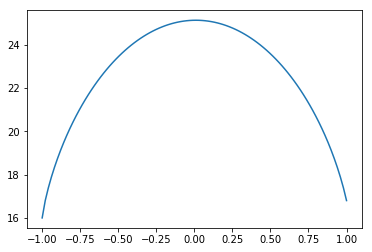

In [11]:
import matplotlib.pyplot as plt
import numpy as np


def f(e, theta):
    return np.sqrt(1 - e**2 * np.sin(theta)**2)


def arc_length_ell(e, a, b, A):
    d = 1000
    dt = 1/d
    integral = 0
    for i in range(d):
        theta = (i*dt) * (b - a) + a
        integral += f(e, theta)
    
    return 4*A*integral*dt*(b - a)


a = 0
b = 2*np.pi
A = 1
e_min = -1
e_max = 1

x = np.linspace(e_min, e_max, 100)
y = np.zeros(len(x))
for i in range(len(x)):
    e = i*(e_max - e_min)/len(x) + e_min
    y[i] = arc_length_ell(e, a, b, A)


plt.plot(x, y)
plt.show()

### $(viii)$

Here, we will do the same as $(vii)$, but with a constant $e$ and a variable $x$ as upper limit for the integral, and $0$ as its bottom limit.
With $e$ close to $0$, you get an almost linear function. When $e$ moves closer to 1, it will zigzag more. (This is true when b is $2\pi$ instead of $\frac{pi}{2}$, as I found out when mistakenly using the wrong limit.

When using an $|e| > |$, it will be linear, with a fall off as $x \to \infty$. (It will also give you error messages, as you are going outside its range, so do it at your own risk.)

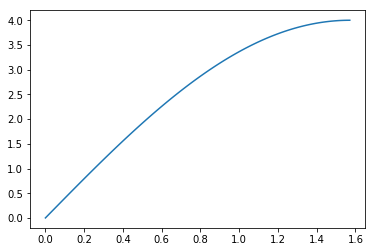

In [12]:
import matplotlib.pyplot as plt
import numpy as np


def f(e, theta):
    return np.sqrt(1 - e**2 * np.sin(theta)**2)


def arc_length_ell(e, a, b, A):
    d = 1000
    dt = 1/d
    integral = 0
    for i in range(d):
        theta = (i*dt) * (b - a) + a
        integral += f(e, theta)
    
    return 4*A*integral*dt*(b - a)


a = 0
b = np.pi/2
A = 1

e = 1

x = np.linspace(a, b, 100)
y = np.zeros(len(x))

for i in range(len(x)):
    y[i] = arc_length_ell(e, a, x[i], A)

plt.plot(x, y)
plt.show()

### $(ix)$
> It takes a few seconds to calculate.

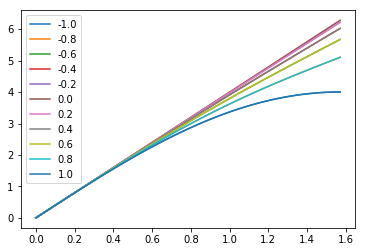

In [13]:
import matplotlib.pyplot as plt
import numpy as np


def f(e, theta):
    return np.sqrt(1 - e**2 * np.sin(theta)**2)


def arc_length_ell(e, a, b, A):
    d = 1000
    dt = 1/d
    integral = 0
    for i in range(d):
        theta = (i*dt) * (b - a) + a
        integral += f(e, theta)
    
    return 4*A*integral*dt*(b - a)


a = 0
b = np.pi/2
A = 1

e = np.linspace(-1, 1, 11)
for j in range(len(e)):
    x = np.linspace(a, b, 100)
    y = np.zeros(len(x))

    for i in range(len(x)):
        y[i] = arc_length_ell(e[j], a, x[i], A)

    plt.plot(x, y)


for i in range(len(e)):
    e[i] = round(e[i], 1)

plt.legend(e)
plt.show()

## 3 - Differential Equations and Euler's Method

In [40]:
import numpy as np
import matplotlib.pylab as plt

h = 0.001

t_0 = 0
t_max = 5


def A(t, y):
    return [y[1], F(t,y[0],y[1])]

def _next_y(t, y):
    return y + np.dot(A(t, y),h)

def _euler(t_0, t_max, y_0):
    t_lst = [t_0]
    z_lst = [y_0]
    y_lst = [y_0[0]]
    lst = np.linspace(t_0, t_max, int((t_max-t_0)/h))

    for i in range(1,len(lst)):
        t_lst.append(t_0 + i*h)
        z_lst.append(_next_y(t_0+(i-1)*h, z_lst[i-1]))
        y_lst.append(z_lst[i][0])
    return t_lst, y_lst

 ### $(i)$

Using the Euler's Method Python code.

Graphs show meters of displacement/movement $m$ and seconds $s$.

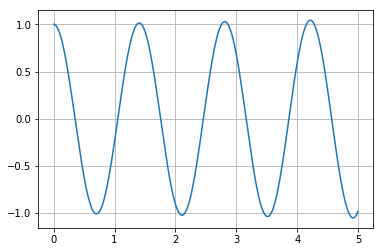

In [41]:
def F(t,y,yprime):          # y'' = F(t,y,y')
    return -k/m * y


k = 15
m = 0.75

fig = plt.figure()          
ax1 = fig.add_subplot(111)
ax1.grid(True)

y_0 = [1,0]  # startverdier [y(0),y'(0)]

x, y = _euler(t_0, t_max, y_0)
ax1.plot(x, y)

fig.show()

### $(ii)$

This shows how the spring system will act with three different forces applied by the spring. $3.0 \frac{N}{m}$, $11.5 \frac{N}{m}$ and $20 \frac{N}{m}$. The pattern is clear: the stronger the force, the faster the mass is moved/accelerated, and the faster initial speed, the higher amplitudes you get. This seems reasonable by physical standards.

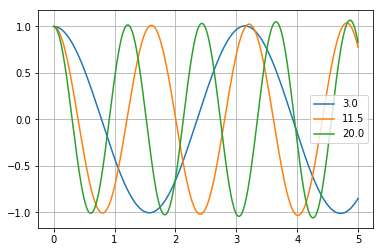

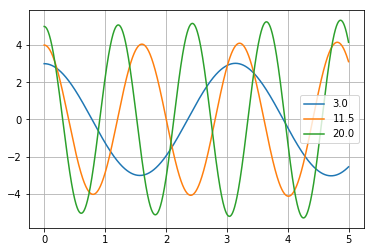

In [16]:
def F(t,y,yprime):          # y'' = F(t,y,y')
    return -k/m * y


k = 0
m = 0.75

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.grid(True)

x_base = np.linspace(3, 20, 3)

y_0 = [1, 0]

for i in range(len(x_base)):
    k = x_base[i]
    x, y = _euler(t_0, t_max, y_0)
    ax1.plot(x, y)

plt.legend(x_base)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.grid(True)

for i in range(len(x_base)):
    y_0 = [i+3, 0]
    k = x_base[i]
    x, y = _euler(t_0, t_max, y_0)
    ax1.plot(x, y)

plt.legend(x_base)
fig.show()

### $(iii)$

Here, the friction $\alpha$ (alpha), which is now part of the differential equation
$$ -\alpha y_p - \frac{k}{m}y $$
(where $y$ is the displacement in meters) has the values of $\alpha \in [0, 4]$ with a step size of $1$.
The higher the friction, the faster the mass slows down.

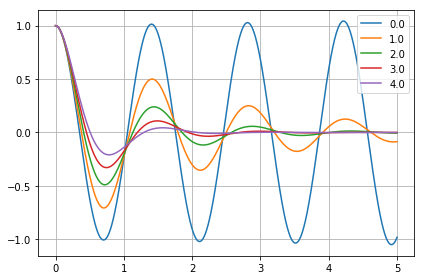

In [17]:
def F(t,y,yprime):          # y'' = F(t,y,y')
    return - k/m * y - alpha*yprime


k = 15
m = 0.75
alpha = 0

fig = plt.figure()          
ax1 = fig.add_subplot(111)
ax1.grid(True)

base = np.linspace(0, 4, 5)

for i in range(len(base)):
    y_0 = [1, 0]
    alpha = base[i]
    x, y = _euler(t_0, t_max, y_0)
    ax1.plot(x, y)
    base[i] = round(base[i], 2)

fig.tight_layout()
plt.legend(base)
fig.show()

### $(iv)$

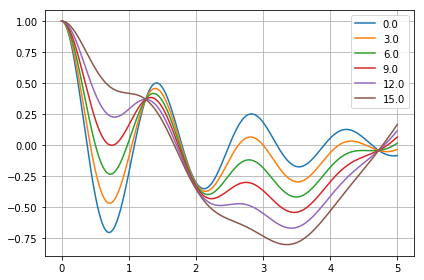

In [18]:
def F(t,y,yprime):          # y'' = F(t,y,y')
    return -alpha*yprime - k/m*y + AA*np.cos(t)


k = 15
m = 0.75
alpha = 1
AA = 0

fig = plt.figure()          
ax1 = fig.add_subplot(111)
ax1.grid(True)

base = np.linspace(0, 15, 6)

for i in range(len(base)):
    y_0 = [1, 0]
    AA = base[i]
    x, y = _euler(t_0, t_max, y_0)
    ax1.plot(x, y)
    base[i] = round(base[i], 2)

fig.tight_layout()
plt.legend(base)
fig.show()

### $(v)$

Use any of the following functions by first running them, and then running the plotting below.

In [19]:
def F(t,y,yprime):
    return -alpha*yprime - t*k/m*y + AA*np.cos(t)

In [20]:
def F(t,y,yprime):
    return -alpha*yprime - t**2*k/m*y + AA*np.cos(t)

In [21]:
def F(t,y,yprime):
    return -alpha*yprime - 1/(t+1)*k/m*y + AA*np.cos(t)

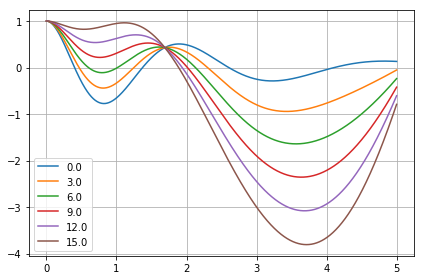

In [22]:
k = 15
m = 0.75
alpha = 1
AA = 0

fig = plt.figure()          
ax1 = fig.add_subplot(111)
ax1.grid(True)

base = np.linspace(0, 15, 6)

for i in range(len(base)):
    y_0 = [1, 0]
    AA = base[i]
    x, y = _euler(t_0, t_max, y_0)
    ax1.plot(x, y)
    base[i] = round(base[i], 2)

fig.tight_layout()
plt.legend(base)
fig.show()

### $(vi)$

Using the Euler's Method + phase code.

In [23]:
import numpy as np
import matplotlib.pylab as plt

h = 0.001

t_0 = 0
t_max = 10


def A(t, y):
    return [y[1], F(t,y[0],y[1])]

def _next_y(t, y):
    return y + np.dot(A(t, y),h)

def _euler(t_0, t_max, y_0):
    t_lst = [t_0]
    z_lst = [y_0]
    y_lst = [y_0[0]]
    yprime_lst = [y_0[1]]
    lst = np.linspace(t_0, t_max, int((t_max-t_0)/h))

    for i in range(1,len(lst)):
        t_lst.append(t_0 + i*h)
        z_lst.append(_next_y(t_0+(i-1)*h, z_lst[i-1]))
        y_lst.append(z_lst[i][0])
        yprime_lst.append(z_lst[i][1])
    return t_lst, y_lst, yprime_lst

In [24]:
def F(t,y,yprime):
    return -alpha*yprime - k/m*y + AA*np.cos(t)

In [25]:
k = 15
m = 0.75

alpha = 0
AA = 0

y_0 = [1,1]     # startverdier y_0 = [y(0), y'(0)]
x, y, yprime = _euler(t_0, t_max, y_0)

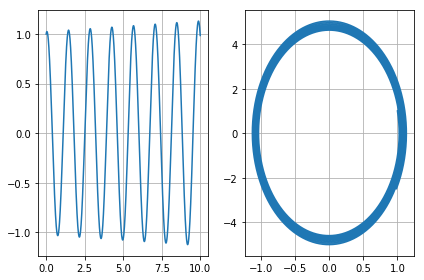

In [26]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.grid(True)
ax2 = fig.add_subplot(122)
ax2.grid(True)

ax1.plot(x, y)
ax2.plot(y,yprime)

fig.tight_layout()
fig.show()

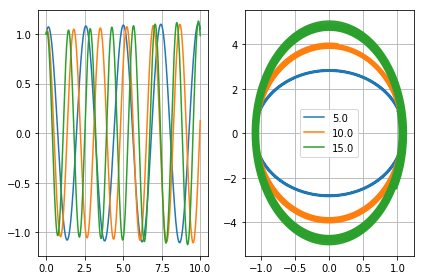

In [27]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.grid(True)
ax2 = fig.add_subplot(122)
ax2.grid(True)

base = np.linspace(5, 15, 3)

for i in range(len(base)):
    k = base[i]
    x, y, yprime = _euler(t_0, t_max, y_0)
    ax1.plot(x, y)
    ax2.plot(y,yprime)
    base[i] = round(base[i], 2)

fig.tight_layout()
plt.legend(base)
fig.show()

Higher friction $\alpha$ makes the mass reduce its speed, and makes the $(y, y_p)$ diagram spiral inwards.

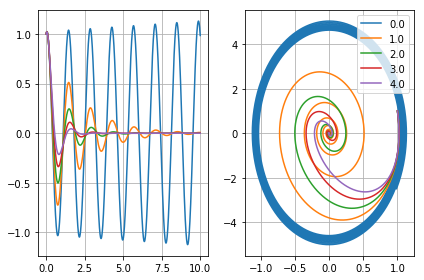

In [28]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.grid(True)
ax2 = fig.add_subplot(122)
ax2.grid(True)

base = np.linspace(0, 4, 5)

for i in range(len(base)):
    alpha = base[i]
    x, y, yprime = _euler(t_0, t_max, y_0)
    ax1.plot(x, y)
    ax2.plot(y,yprime)
    base[i] = round(base[i], 2)

fig.tight_layout()
plt.legend(base)
fig.show()

Changing the AA ($A$) value.

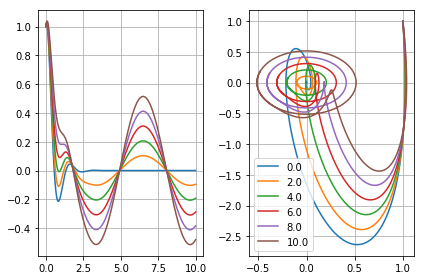

In [29]:
def F(t,y,yprime):
    return -alpha*yprime - k/m*y + AA*np.cos(t)


fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.grid(True)
ax2 = fig.add_subplot(122)
ax2.grid(True)

base = np.linspace(0, 10, 6)

for i in range(len(base)):
    AA = base[i]
    x, y, yprime = _euler(t_0, t_max, y_0)
    ax1.plot(x, y)
    ax2.plot(y,yprime)
    base[i] = round(base[i], 2)

fig.tight_layout()
plt.legend(base)
fig.show()

Experimentation with changes in $\alpha(t)$ and $\omega^2(t)$.

Making $A$ (from $A \, cos(t)$) more affecting will make the mass start swinging more like a sine wave, while making $A$ smaller will make it less affecting.

$A \, cos(t)$ will be the base line for the displacement, where the system will converge, assuming friction.
$\omega^2(t)$ will force movement back and forth as long as it is not overpowered by the friction force.
$\alpha(t)$ will reduce the movement over time, and make the displacement converge.

Changing $\alpha(t)$ will affect how the 

Making the friction force or the spring force positive will make the system quickly spiral out of control as it becomes a positive feedback loop.

In [30]:
k = 15
m = 0.75
AA = 2
alpha = 1

In [31]:
def F(t,y,yprime):
    return -alpha*yprime - k/m*y + AA*np.cos(t)

In [32]:
def F(t,y,yprime):
    return -alpha*yprime - t*k/m*y - AA*np.cos(t)

In [33]:
def F(t,y,yprime):
    return -alpha*yprime - k/m*y + 10*AA*np.cos(t)

In [34]:
def F(t,y,yprime):
    return -alpha*yprime - t**2*k/m*y + AA*np.cos(t)

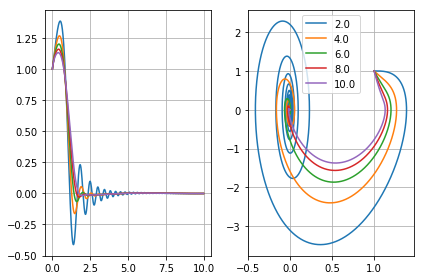

In [35]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.grid(True)
ax2 = fig.add_subplot(122)
ax2.grid(True)

base = np.linspace(2, 10, 5)

for i in range(len(base)):
    alpha = base[i]
    x, y, yprime = _euler(t_0, t_max, y_0)
    ax1.plot(x, y)
    ax2.plot(y,yprime)
    base[i] = round(base[i], 2)

fig.tight_layout()
plt.legend(base)
fig.show()

### $(vii)$
The Duffing equation, shown below, describe an oscillator using Hooke's law.

$$ \frac{d^2s}{dt^2} + \alpha(t)\frac{ds}{dt} + \omega^2(t) \, s(t) + \gamma \, s(t)^3 = \beta \, cos(ut), \quad \beta, u \in \mathbb{R} $$

Conclusion: Reminds me of a Picasso.

In [36]:
k = 15
m = 0.75
AA = 2
alpha = 0.3
beta = 1
gamma = 1
omega2 = -1
u = 1.2
y = [1, 0]

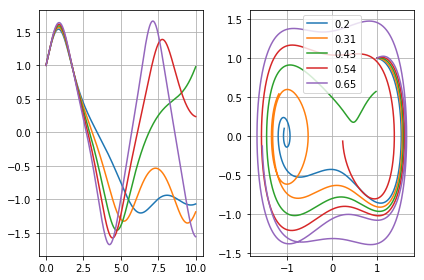

In [37]:
def F(t,y,yprime):
    return -alpha*yprime - omega2*y - gamma*y**3 + beta*np.cos(u*t)


fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.grid(True)
ax2 = fig.add_subplot(122)
ax2.grid(True)

base = np.linspace(0.2, 0.65, 5)

for i in range(len(base)):
    beta = base[i]
    x, y, yprime = _euler(t_0, t_max, y_0)
    ax1.plot(x, y)
    ax2.plot(y,yprime)
    base[i] = round(base[i], 2)

fig.tight_layout()
plt.legend(base)
fig.show()

### $(viii)$

In [38]:
k = 15
m = 0.75
alpha = 0.7
beta = 2
gamma = 5
omega2 = -1.5
u = 5
y = [-1, -1]

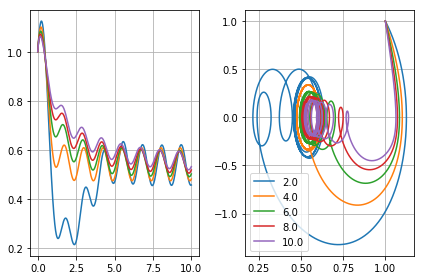

In [39]:
def F(t,y,yprime):
    return -alpha*yprime - omega2*y - gamma*y**3 + beta*np.cos(u*t)


fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.grid(True)
ax2 = fig.add_subplot(122)
ax2.grid(True)

base = np.linspace(2, 10, 5)


for i in range(len(base)):
    alpha = base[i]
    x, y, yprime = _euler(t_0, t_max, y_0)
    ax1.plot(x, y)
    ax2.plot(y,yprime)
    base[i] = round(base[i], 2)

fig.tight_layout()
plt.legend(base)
fig.show()